## Toolbox Loading

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd
import re

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Model evaluation
from sklearn.metrics import mean_absolute_error, r2_score

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
retail = pd.read_csv(r'C:\Users\USER1\Desktop\retail_price.csv')

## Data Exploration

In [3]:
#Checking shape of dataset
retail.shape

(676, 30)

In [4]:
#first 7 rows of the dataset
retail.head(7)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.95
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.9,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.95
6,bed1,bed_bath_table,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.9,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.95


In [5]:
#last 5 rows of the dataset
retail.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [6]:
# Looking at information about the columns
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [7]:
#statistical description of the dataset
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [8]:
#statistical description of categorical columns of the dataset
retail.describe(include = 'object').T

,count,unique,top,freq
product_id,676,52,health5,20
product_category_name,676,9,garden_tools,160
month_year,676,20,01-03-2018,50


## Data Cleaning

In [9]:
#checking  for nulll inputs
retail.isnull().sum().sum()

0

In [10]:
# How many are the duplicates?
retail[retail.duplicated()].shape

(0, 30)

## Exploratory Data Analysis

In [11]:
# Exploring the distribution of the prices
fig = px.histogram(retail,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

In [12]:
# Exploring the distribution of the unit prices
fig = px.box(retail,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

In [13]:
# Relationship between quantity and total prices
fig = px.scatter(retail,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

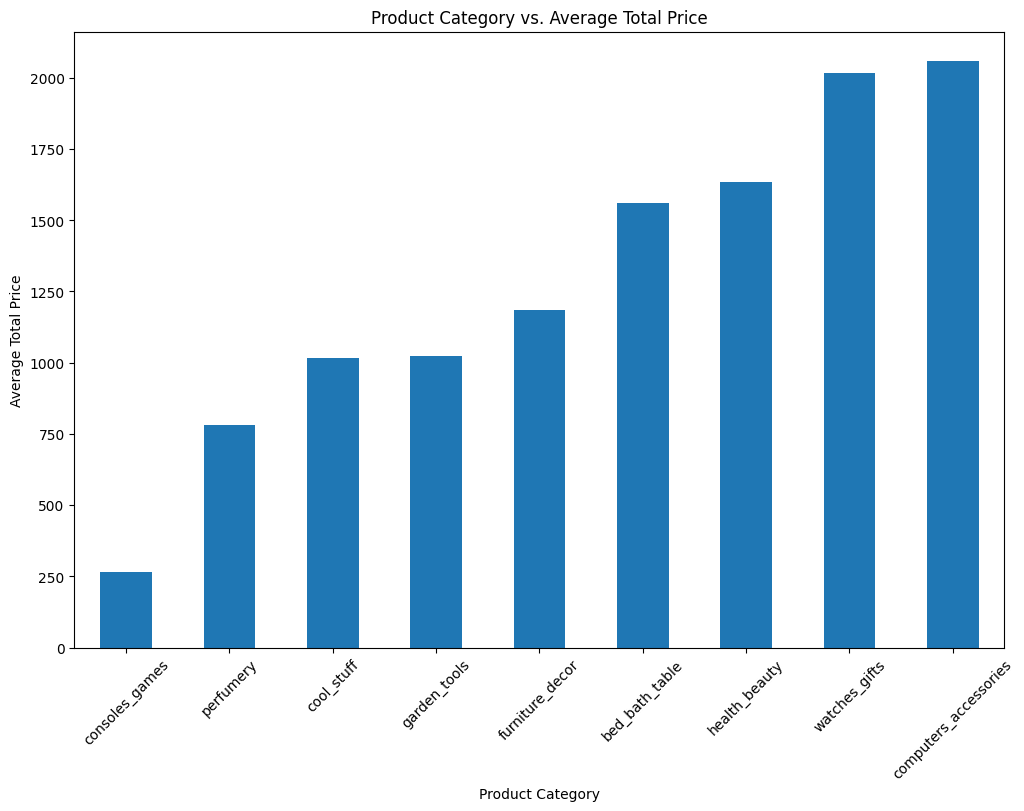

In [14]:
# Bar plot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
retail.groupby('product_category_name')['total_price'].mean().sort_values().plot(kind='bar')
plt.title('Product Category vs. Average Total Price')
plt.xlabel('Product Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=45)
plt.show()

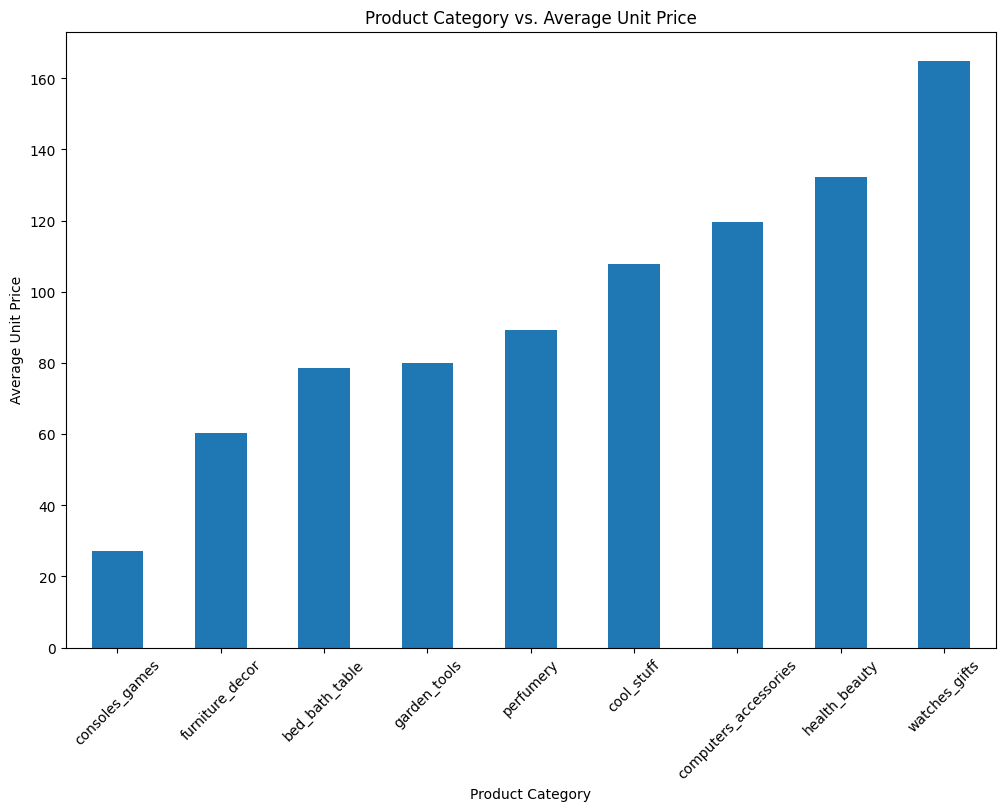

In [15]:
# Bar plot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
retail.groupby('product_category_name')['unit_price'].mean().sort_values().plot(kind='bar')
plt.title('Product Category vs. Average Unit Price')
plt.xlabel('Product Category')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Distribution of total prices by weekday
fig = px.box(retail, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

In [17]:
# Distribution of total prices by holiday
fig = px.box(retail, x='holiday', 
             y='total_price', 
             title='Box Plot of Total Price by Holiday')
fig.show()

In [18]:
# Distribution of total prices by weekend
fig = px.box(retail, x='weekend', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

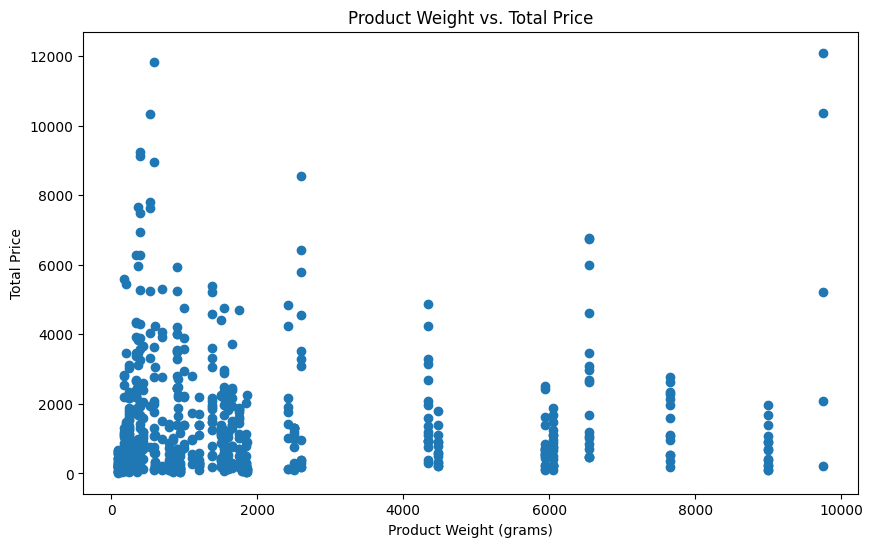

In [19]:
# Scatter plot of product_weight_g vs. total_price
plt.figure(figsize=(10, 6))
plt.scatter(retail['product_weight_g'], retail['total_price'])
plt.title('Product Weight vs. Total Price')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Total Price')
plt.show()

In [20]:
#bar plot showing customers per month
fig = px.bar(retail,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()

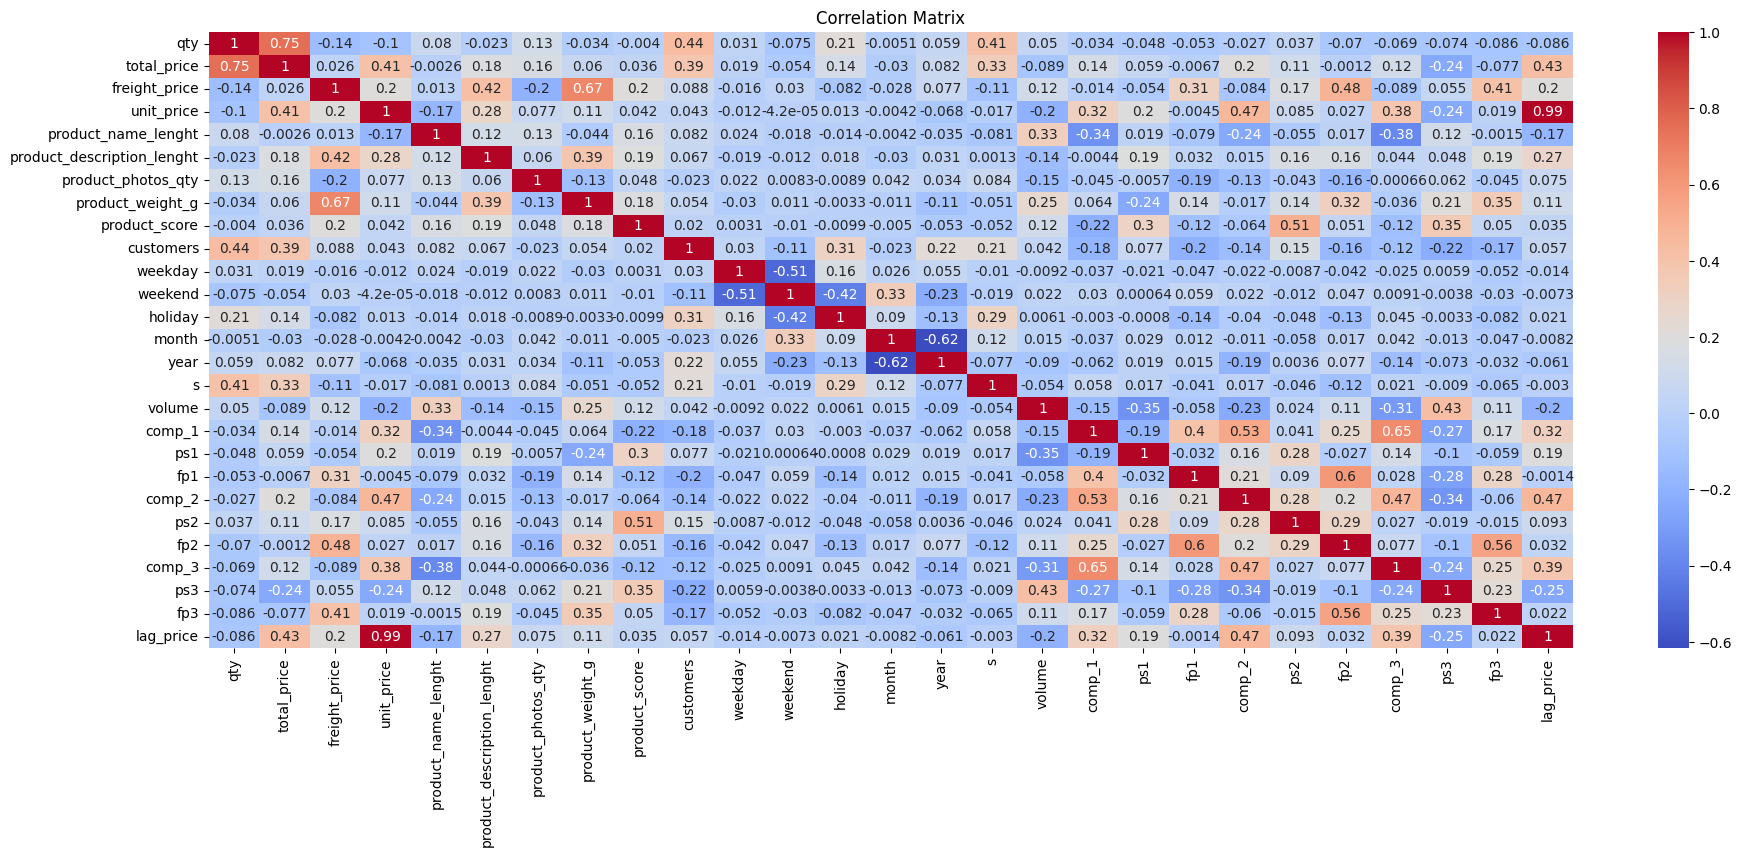

In [21]:
# Compute correlation matrix
corr_matrix = retail.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(22, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
#Difference between unit price and competitors prices
retail['comp1_diff'] = retail['unit_price'] - retail['comp_1']
retail['comp2_diff'] = retail['unit_price'] - retail['comp_2']
retail['comp3_diff'] = retail['unit_price'] - retail['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=retail['product_category_name'],
                 y=retail[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [23]:
#correlation with unit price
corrs = retail.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

In [24]:
#dataset information
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [25]:
#dropping columns with high correlations
retail = retail.drop(columns = ["product_id","month_year","total_price","qty",'lag_price','comp1_diff','comp2_diff','comp3_diff','freight_price'])

## Feature Engineering

In [26]:
#encoding categorical variables
retail_encoded = pd.get_dummies(retail, columns = ["product_category_name"])

In [27]:
#creating list of categorical column
numerical = [column for column in retail_encoded.columns if (retail_encoded[column].dtype != "0")]
numerical

['unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'product_category_name_bed_bath_table',
 'product_category_name_computers_accessories',
 'product_category_name_consoles_games',
 'product_category_name_cool_stuff',
 'product_category_name_furniture_decor',
 'product_category_name_garden_tools',
 'product_category_name_health_beauty',
 'product_category_name_perfumery',
 'product_category_name_watches_gifts']

In [28]:
retail_scaled = retail_encoded.copy()

In [29]:
sc = StandardScaler()
retail_scaled[numerical] = sc.fit_transform(retail_encoded[numerical])

In [30]:
# Defining the predictor variables
X = retail_scaled.drop("unit_price", axis = 1)
X.shape

(676, 31)

In [31]:
# Defining the target variable
y = retail_scaled["unit_price"]
y.shape

(676,)

In [32]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

## Modelling

In [33]:
model = DecisionTreeRegressor()

In [34]:
model.fit(X_train, y_train)
y_pred = model.predict(X)

In [35]:
print(f"R2 score: {r2_score(y, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

R2 score: 0.9856074007194415
Mean Absolute Error: 0.022393492055706215


In [36]:
y_pred = model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

In [37]:
 # Feature importances
importance = model.feature_importances_
importance = pd.DataFrame(importance, columns=["score"]).reset_index()
importance["Feature"] = list(X.columns)
importance.drop(columns=["index"], inplace=True)
importance.sort_values(by="score", ascending=False, ignore_index=True, inplace=True)

# Plotting the feature importances
top_scores = importance.nlargest(5, 'score')
fig = px.bar(top_scores, x="Feature", y="score")
fig.show()

In [38]:
model = RandomForestRegressor()

In [39]:
model.fit(X, y)
y_pred = model.predict(X)

In [40]:
print(f"R2 score: {r2_score(y, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

R2 score: 0.9976744603248417
Mean Absolute Error: 0.021230963155124037


In [41]:
y_pred = model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

In [42]:
 # Feature importances
importance = model.feature_importances_
importance = pd.DataFrame(importance, columns=["score"]).reset_index()
importance["Feature"] = list(X.columns)
importance.drop(columns=["index"], inplace=True)
importance.sort_values(by="score", ascending=False, ignore_index=True, inplace=True)

# Plotting the feature importances
top_scores = importance.nlargest(5, 'score')
fig = px.bar(top_scores, x="Feature", y="score")
fig.show()